<a href="https://colab.research.google.com/github/sjosephnyc1987/public_ipython_Notebooks/blob/main/Gazelle_Glider_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initializations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')



In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/TEMPO/datasets/GazelleGlider_mod1.csv")

#separating the categorical and continueous variables
categorical = ['Station Name', 'Daypart Name' , 'Rotation','BC Day']
continueous = {'pink':'Rate','blue':'CALL','black':'ORDR','orange':'OnlineVisits'}

#create the dataframe that will hold the results of the regression analysis
columns_names = ['predictor','target','F-value','df-model','df-residual','f-critical','model p-value',
                 'r-squared','y-intercept','x-coeff','p-val y-intercept','p-val x-intercept', 'Model Standard Error']
regression_results = pd.DataFrame(columns=columns_names)


## Categorical Variables
First we spin through all the categorical variables and plot them vs Revenue to see is there's something to be learned from looking at things visually.

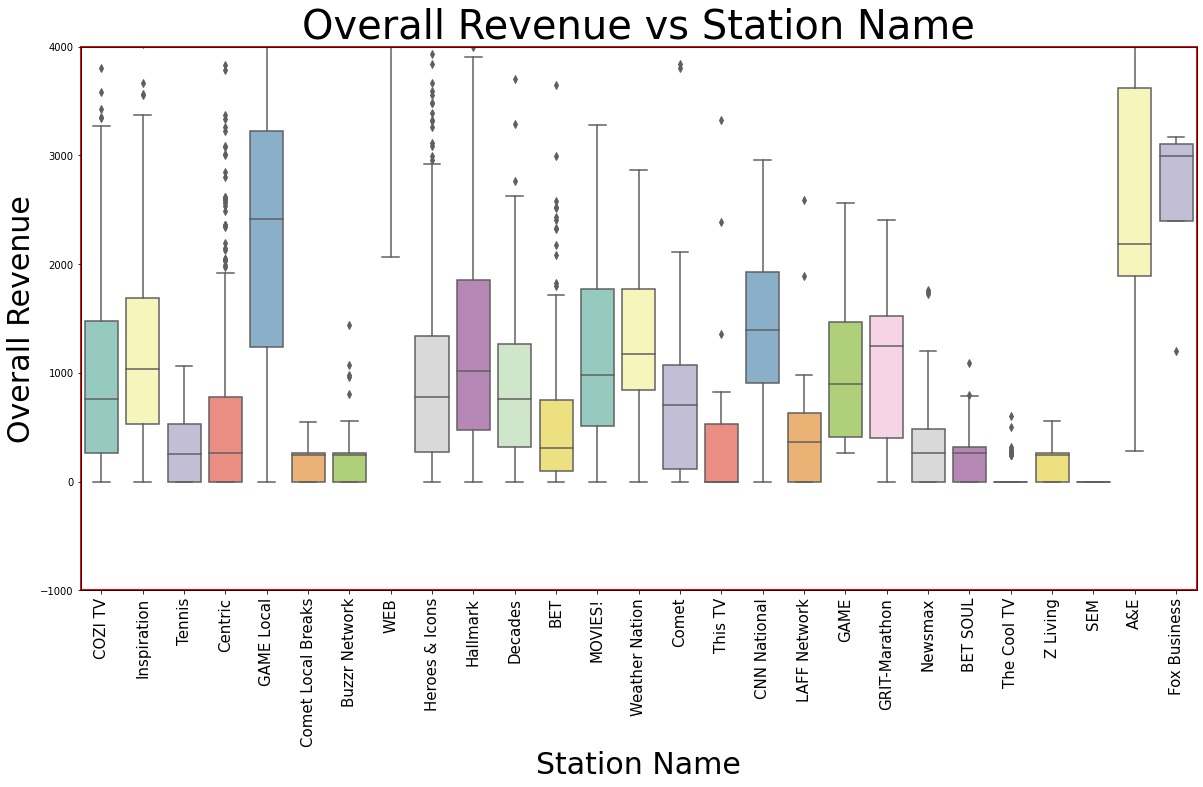

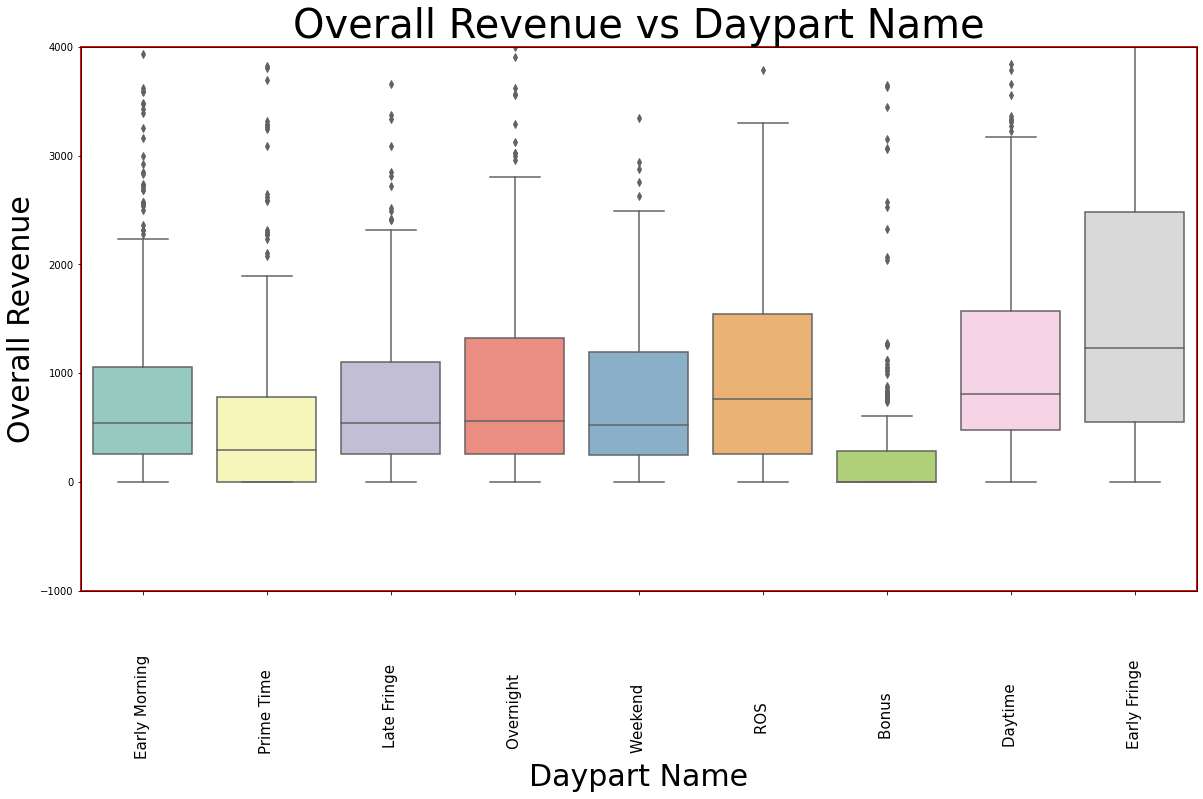

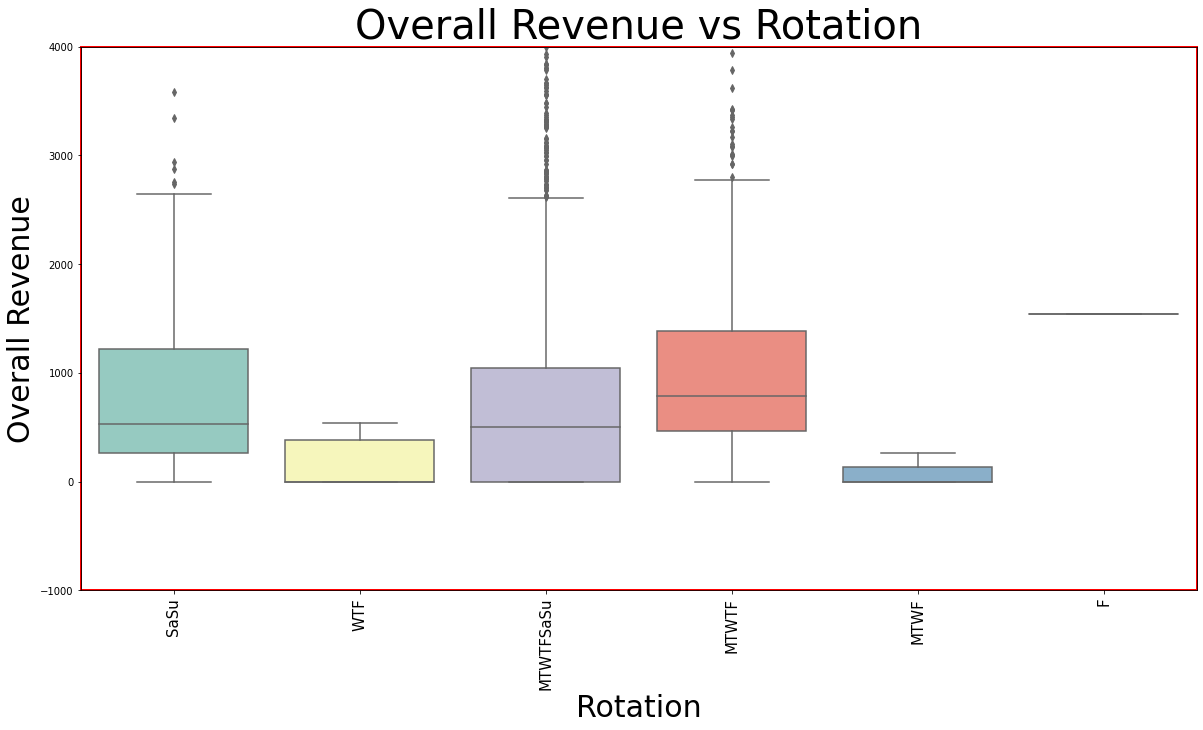

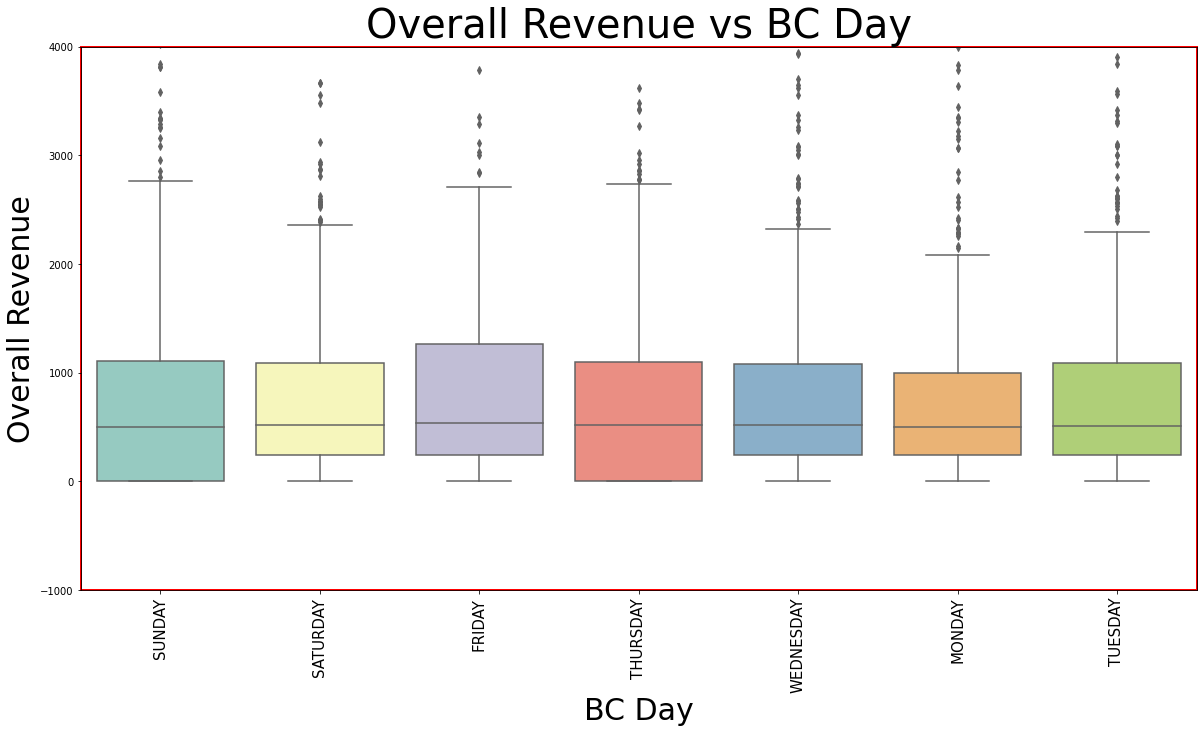

In [11]:
for var in categorical:
    plt.figure(figsize = (20,10))
    ax3 = sns.boxplot(x=df2[var], y=df2["OverallRevenue"], data=df2, palette = "Set3")
    strTitle = "Overall Revenue vs " +  var
    ax3.set_title(strTitle ,fontsize = 40)
    ax3.set_xlabel(var,fontsize=30)
    ax3.set_ylabel("Overall Revenue",fontsize=30)
    ax3.set_ylim(-1000, 4000)
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90,fontsize =15)
    ax3.patch.set_edgecolor('red')  
    ax3.patch.set_linewidth('2') 
    plt.show()
    #print("__________________________________________________________________________________________________________")

## Continueous Variables
We then look at the continueous variables and run regressions on them one at time and examine the regression parameters.

Rate
0     247
1     285
2     238
3    1188
4     247
Name: Rate, dtype: int64
                            OLS Regression Results                            
Dep. Variable:         OverallRevenue   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     154.8
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.85e-35
Time:                        22:21:41   Log-Likelihood:                -29382.
No. Observations:                3388   AIC:                         5.877e+04
Df Residuals:                    3386   BIC:                         5.878e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


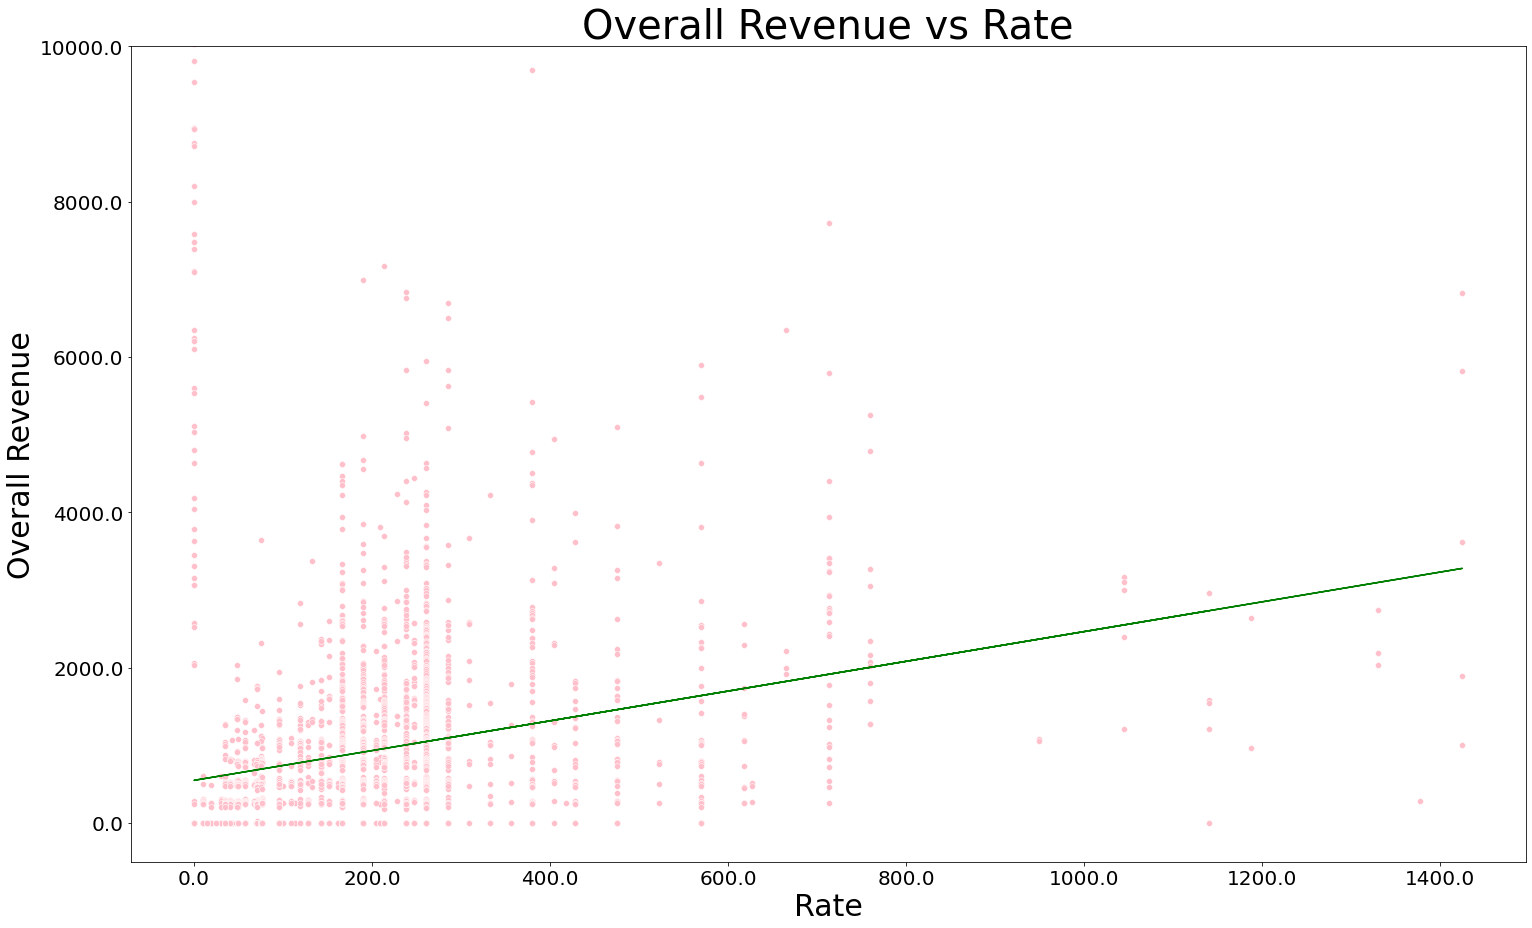

CALL
0    27
1     7
2    14
3    64
4    10
Name: CALL, dtype: int64
                            OLS Regression Results                            
Dep. Variable:         OverallRevenue   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3926.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        22:21:41   Log-Likelihood:                -28153.
No. Observations:                3388   AIC:                         5.631e+04
Df Residuals:                    3386   BIC:                         5.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


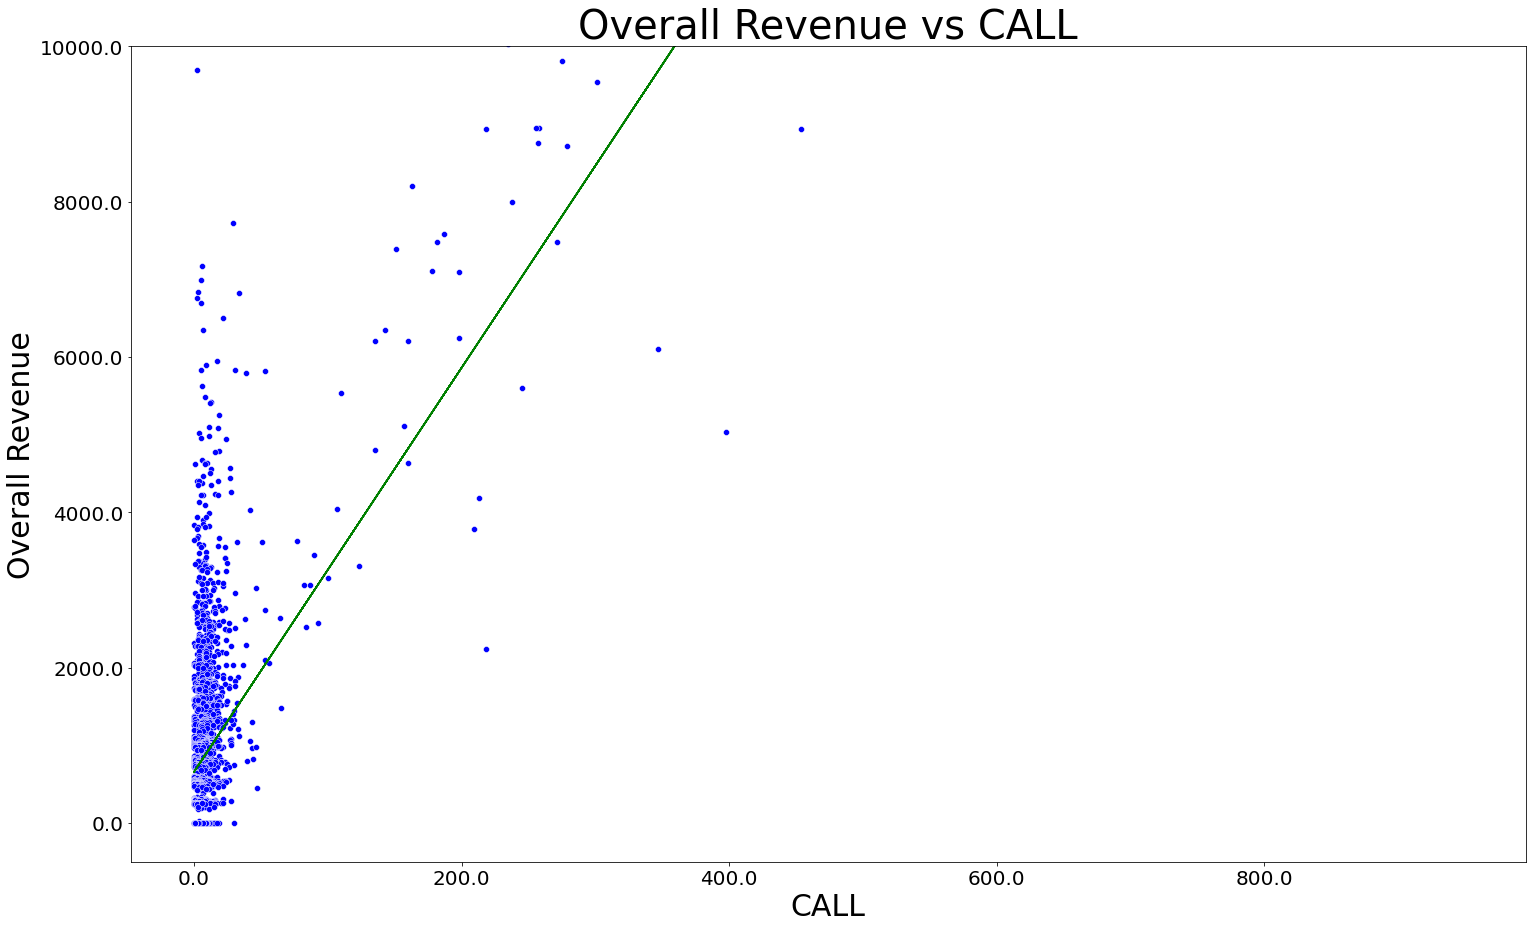

ORDR
0    11
1     2
2     3
3     6
4     3
Name: ORDR, dtype: int64
                            OLS Regression Results                            
Dep. Variable:         OverallRevenue   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     5474.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        22:21:41   Log-Likelihood:                -27828.
No. Observations:                3388   AIC:                         5.566e+04
Df Residuals:                    3386   BIC:                         5.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


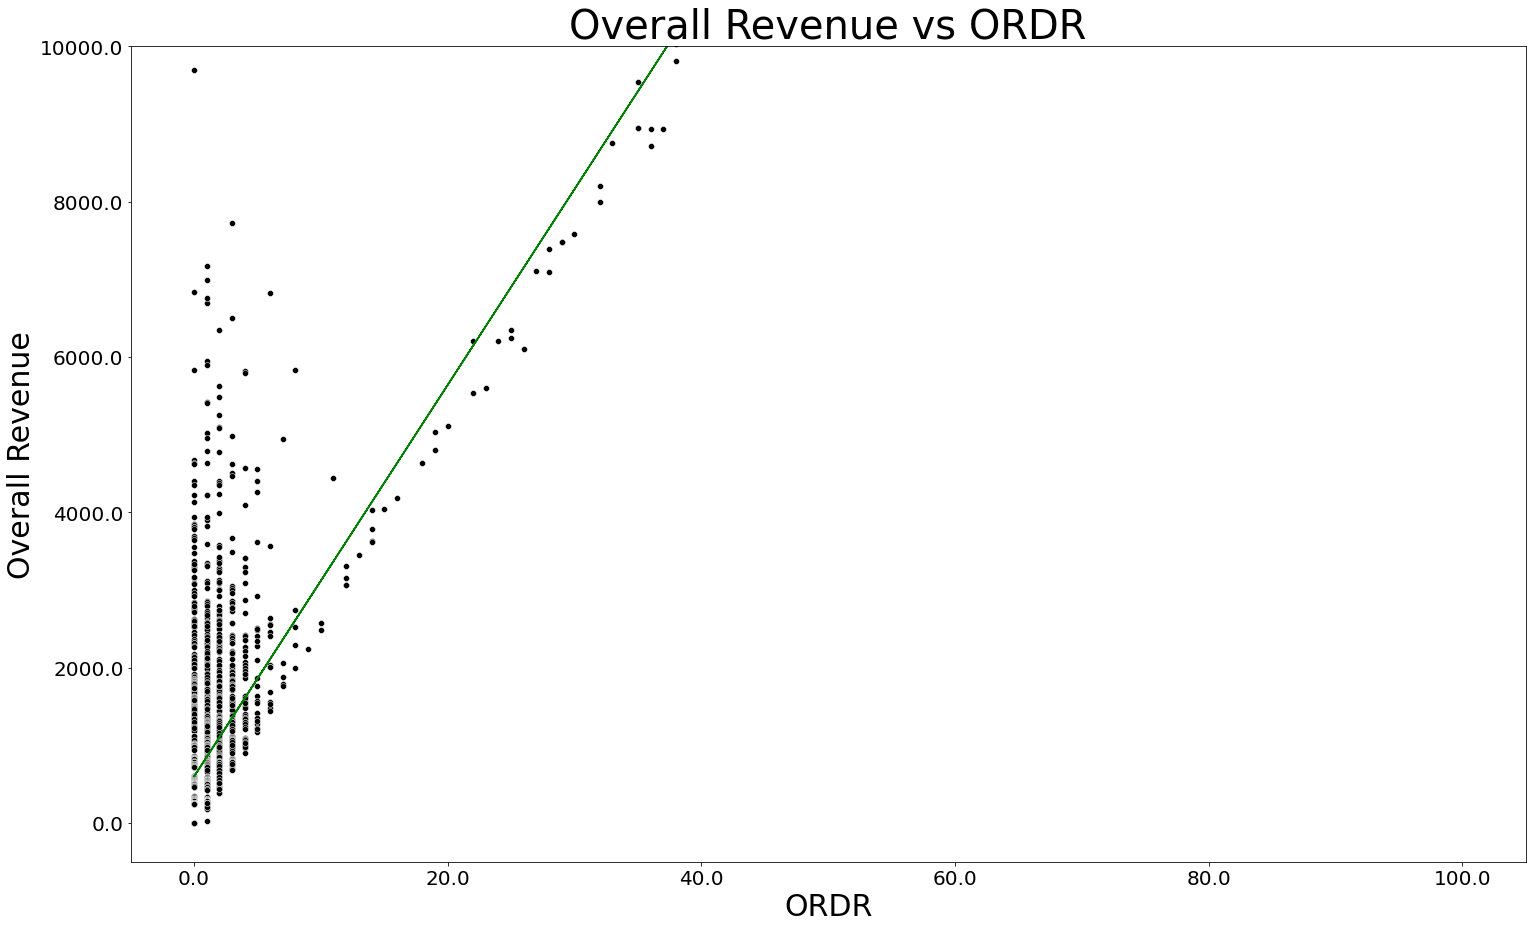

OnlineVisits
0      23
1     387
2    1698
3     418
4     198
Name: OnlineVisits, dtype: int64
                            OLS Regression Results                            
Dep. Variable:         OverallRevenue   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     510.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.85e-105
Time:                        22:21:42   Log-Likelihood:                -29219.
No. Observations:                3388   AIC:                         5.844e+04
Df Residuals:                    3386   BIC:                         5.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


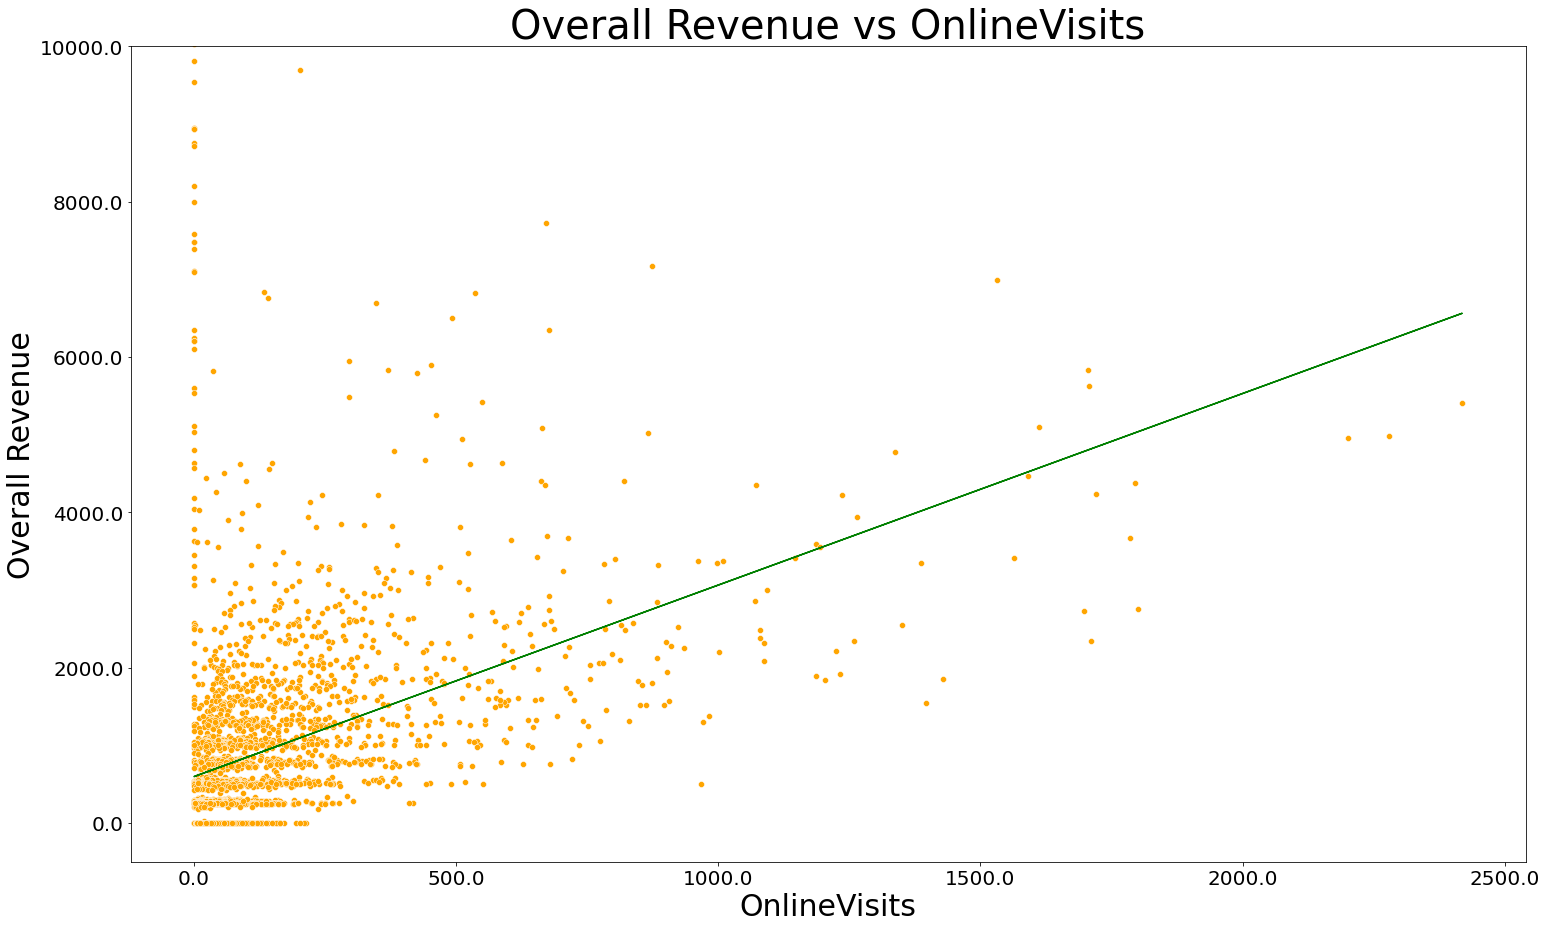

In [16]:
for key,value in continueous.items():
    print(value)
    print(df2[value].head())
    
    #-------------- REGRESSION ---------------------

    X1 = df2[value]
        
    Y = df2["OverallRevenue"]
    
    # # #to make statsmodels work, you have to add a constant to X
    X1 = sm.add_constant(X1)
    
    # #running the regression
    model2 = sm.OLS(Y, X1) #note that the x and y are inverted here.
    results2 = model2.fit()
    print(results2.summary())
    
    #F-TEST
    fvalue2 = results2.fvalue
    dfn_value2=results2.df_model
    dfd_value2=results2.df_resid
    
    #lets see if the F-test means anything
    f_critical2 = scipy.stats.f.ppf(q=1-0.05, dfn=dfn_value2, dfd=dfd_value2)
    
    if (fvalue2 > f_critical2):   
        print("\n\nwoohoo !! reject null hypothsis ! let's keep truckin !!!")
    else:
         print("!!!!!! DEATH !!!!!!!")    
      
    
    #lets' find the p-values that matter
    pvdataframe2 = pd.DataFrame(results2.pvalues)
    pvdataframe2 = pvdataframe2[pvdataframe2[0] < 0.05]
    print("\n=====Regression Coefficents  that matter======  ", pvdataframe2)
    
    #------standard error from the model 
    std_error_model = np.sqrt(results2.scale)


    #updating the regression results dataframe
    
    regression_results.loc[value] = [value,"OverallRevenue",fvalue2,dfn_value2,dfd_value2 ,
                                     f_critical2, results2.f_pvalue, results2.rsquared,
                                     results2.params[0] ,results2.params[1], results2.pvalues[0]
                                     ,results2.pvalues[1], std_error_model]
    
    intercept = results2.params[0]
    slope = results2.params[1]
    
    y_predicted = intercept + (slope * X1)
    
    
    plt.figure(figsize = (25,15))
    #sns.color_palette("mako")
    ax3 = sns.scatterplot(x=df2[value], y=df2["OverallRevenue"], data=df2, color = key)
    strTitle = "Overall Revenue vs " +  value
    ax3.set_title(strTitle ,fontsize = 40)
    ax3.set_xlabel(value,fontsize=30)
    ax3.set_ylabel("Overall Revenue",fontsize=30)
    ax3.set_ylim(-500, 10000)
    xlabels = ax3.get_xticks().tolist()
    ylabels = ax3.get_yticks().tolist()
    ax3.set_xticklabels(xlabels,fontsize =20)
    ax3.set_yticklabels(ylabels,fontsize =20)
    ax3.plot(X1,y_predicted, color="green",label = "fitted line")

    plt.show()




## Regression results

Finally we look at the results of the regressions to see which variables are best.

In [14]:
print(regression_results)

                 predictor          target      F-value  df-model  \
Rate                  Rate  OverallRevenue   154.792039       1.0   
CALL                  CALL  OverallRevenue  3926.298029       1.0   
ORDR                  ORDR  OverallRevenue  5473.533653       1.0   
OnlineVisits  OnlineVisits  OverallRevenue   510.805897       1.0   

              df-residual  f-critical  model p-value  r-squared  y-intercept  \
Rate               3386.0    3.844207   8.850783e-35   0.043717   548.959546   
CALL               3386.0    3.844207   0.000000e+00   0.536944   657.662048   
ORDR               3386.0    3.844207   0.000000e+00   0.617813   597.170608   
OnlineVisits       3386.0    3.844207  1.851416e-105   0.131083   597.081726   

                 x-coeff  p-val y-intercept  p-val x-intercept  \
Rate            1.915155       1.553695e-47       8.850783e-35   
CALL           26.016379      1.044678e-262       0.000000e+00   
ORDR          252.101492      1.250033e-258       0.000